# Tag annotation
Guillermo Arámburo Rodríguez
27/02/2024

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Import dataset of annotated tracks
audio_features_df = pd.read_csv('gtzan_audio_features.csv', index_col=0)
audio_features_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-75.310120,83.352333,10.692239,14.464298,14.244169,7.392612,5.275317,-0.394537,5.729705,3.368037,...,8.077938,7.741452,7.429250,7.301515,8.889630,9.065014,8.561130,8.687922,9.829155,/Users/georgetzanetakis/data/sound/genres/pop/...
1,-68.928207,73.759949,-12.472088,9.549265,-0.037815,12.726260,3.162044,-0.072350,2.534841,2.882886,...,9.794392,6.656365,6.554772,5.462408,5.955102,5.830957,5.741117,6.052407,7.146235,/Users/georgetzanetakis/data/sound/genres/pop/...
2,-113.112213,41.596046,21.518061,11.100334,17.437881,0.610943,3.028697,0.086027,3.453745,0.289805,...,8.606579,8.532875,6.970253,7.541542,6.964867,7.524983,8.629293,9.005406,8.938041,/Users/georgetzanetakis/data/sound/genres/pop/...
3,-73.322212,97.488853,16.858400,-0.587017,7.188521,4.874156,0.759747,-5.546975,1.001608,4.935908,...,9.271461,8.471622,8.623558,9.334666,9.367387,8.954093,8.190073,9.534074,8.912363,/Users/georgetzanetakis/data/sound/genres/pop/...
4,-18.115849,72.282204,-4.890481,-0.378657,1.685867,-0.925050,-1.330335,-0.343852,0.651997,-0.186307,...,7.954674,6.357854,6.179004,6.381464,6.950661,6.816547,6.200847,5.989541,6.534227,/Users/georgetzanetakis/data/sound/genres/pop/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-192.072937,105.570137,-26.020508,40.166473,-6.661609,26.503607,-10.378772,18.473543,-14.002913,14.932205,...,5.416442,6.170383,6.588534,6.883260,7.565061,6.934035,7.552053,7.465764,8.007924,/Users/georgetzanetakis/data/sound/genres/jazz...
996,-305.444885,121.933464,2.606408,36.942242,-8.558879,17.920361,-9.269381,10.571828,-9.929619,2.325254,...,6.549432,9.654927,8.414710,10.824375,9.998603,10.255475,11.212152,11.717621,9.763933,/Users/georgetzanetakis/data/sound/genres/jazz...
997,-414.035278,104.864693,-7.839935,37.852409,0.176041,23.409214,-7.302678,5.758042,-1.056865,8.495793,...,7.100914,9.458298,10.149640,15.695943,19.465609,16.932461,14.767730,17.325022,22.495892,/Users/georgetzanetakis/data/sound/genres/jazz...
998,-262.060669,108.989754,-6.337936,55.166401,-10.659160,18.519104,-4.244628,18.544847,-19.702841,17.573423,...,5.799604,6.242539,6.301960,6.292212,6.183398,8.168219,10.434671,10.266586,8.978737,/Users/georgetzanetakis/data/sound/genres/jazz...


In [3]:
filenames_df = pd.read_csv('gtzan_filenames.csv', index_col=0)

In [4]:
tags_df = pd.read_csv('gtzan_MTT_musicnn_tags.csv', index_col=0)
tags_df

,ambient,beat,beats,cello,classic,classical,country,dance,drums,electronic,...,soft,solo,strings,synth,techno,violin,vocal,vocals,woman,filename
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,/Users/georgetzanetakis/data/sound/genres/pop/...
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,/Users/georgetzanetakis/data/sound/genres/pop/...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,/Users/georgetzanetakis/data/sound/genres/pop/...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,/Users/georgetzanetakis/data/sound/genres/pop/...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,/Users/georgetzanetakis/data/sound/genres/pop/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
998,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...


- Using the loaded data calculate and display the most popular tag for each genre. The original genre labels are included as tags with the prefix genre_ (for example genre_classical, genre_pop).

Every genre has 100 tracks so to find the most popular tag for each genre we can just cycle every 100 tracks and do the same process

In [5]:
topTags = []
for n in range(10):
    topTags.append(tags_df.columns[np.argmax( np.sum(tags_df.iloc[n*100:(n + 1)*100,:-1], axis=0) )])

topTags

['genre_pop',
 'genre_metal',
 'genre_disco',
 'genre_blues',
 'genre_reggae',
 'genre_classical',
 'genre_rock',
 'genre_hiphop',
 'genre_country',
 'genre_jazz']

Everytime the genre tag is the most popular one, just for fun lets find the second most popular one

In [6]:
topTags = []
for n in range(10):
    rmv = tags_df.columns[np.argmax( np.sum(tags_df.iloc[n*100:(n + 1)*100,:-1], axis=0) )]
    topTags.append(tags_df.columns[np.argmax( np.sum(tags_df.iloc[n*100:(n + 1)*100,:-1].drop(rmv, axis=1), axis=0)) + 1])
    print("The most popular tag for " + rmv + " is: " + topTags[n])

The most popular tag for genre_pop is: female vocal
The most popular tag for genre_metal is: rock
The most popular tag for genre_disco is: electronic
The most popular tag for genre_blues is: guitar
The most popular tag for genre_reggae is: electronic
The most popular tag for genre_classical is: country
The most popular tag for genre_rock is: guitar
The most popular tag for genre_hiphop is: techno
The most popular tag for genre_country is: guitar
The most popular tag for genre_jazz is: guitar


- Query-by-text: write a function that takes as input a string representing a sentence, parses it to identify words that corresponds to the 51 tags in the dataset and then returns all tracks that contain these tags. For example for the input 'Find me songs that are slow and have a guitar' should return a list of tracks that have the tags guitar and slow. Show 3 examples of calling the function.

In [7]:
# The functions returns the track with tags just to prove it works
tagList = tags_df.columns[:-1]
def QBT(phrase):
    # Separate phrase by words
    words = phrase.split()
    # Find tags
    tags = []
    for n in range(len(words)):
        check = np.sum( np.where(tagList == words[n])[0] ) # index of tags
        if check > 0:
            tags.append(check)
    trackIndx = np.prod(tags_df.iloc[:,tags].to_numpy(), axis=1)
    return tags_df.iloc[trackIndx==1,:]

In [8]:
QBT("Find me songs that are slow and have a guitar")

,ambient,beat,beats,cello,classic,classical,country,dance,drums,electronic,...,soft,solo,strings,synth,techno,violin,vocal,vocals,woman,filename
82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,/Users/georgetzanetakis/data/sound/genres/pop/...
158,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/meta...
192,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/meta...
226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/disc...
300,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/blue...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
984,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
987,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
988,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...


In [9]:
QBT("A techno song with a synth beat")

,ambient,beat,beats,cello,classic,classical,country,dance,drums,electronic,...,soft,solo,strings,synth,techno,violin,vocal,vocals,woman,filename
38,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/pop/...
58,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/pop/...
207,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/disc...
230,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/disc...
239,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/disc...
297,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/disc...
420,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/regg...
422,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/regg...
424,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/regg...
446,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,/Users/georgetzanetakis/data/sound/genres/regg...


In [10]:
QBT("country songs with a violin")

,ambient,beat,beats,cello,classic,classical,country,dance,drums,electronic,...,soft,solo,strings,synth,techno,violin,vocal,vocals,woman,filename
906,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
938,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
946,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
952,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
961,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
968,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
983,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...
985,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,/Users/georgetzanetakis/data/sound/genres/jazz...


- Now consider the provided tags as ground truth and train a multi-label classifier using sklearn. The OneVsRestClassifier performs what is called the binary relevance approach to multi-label classification in which a separate classifier is trained independently for each tag. For example to train a linear SVM you can use the following code:

- Train a classifier using the loaded data and the display the classification report for this multi-label problem using the entire dataset for both training and testing.

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.svm import SVC

# Set data
audio_features = audio_features_df.iloc[:,:-1].to_numpy()
tag_matrix = tags_df.iloc[:,:-1].to_numpy()

# Create and fit model, took around 12 mins to run...
clf = OneVsRestClassifier(SVC(kernel='linear'))
clf.fit(audio_features, tag_matrix)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

c:\Users\garam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\garam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


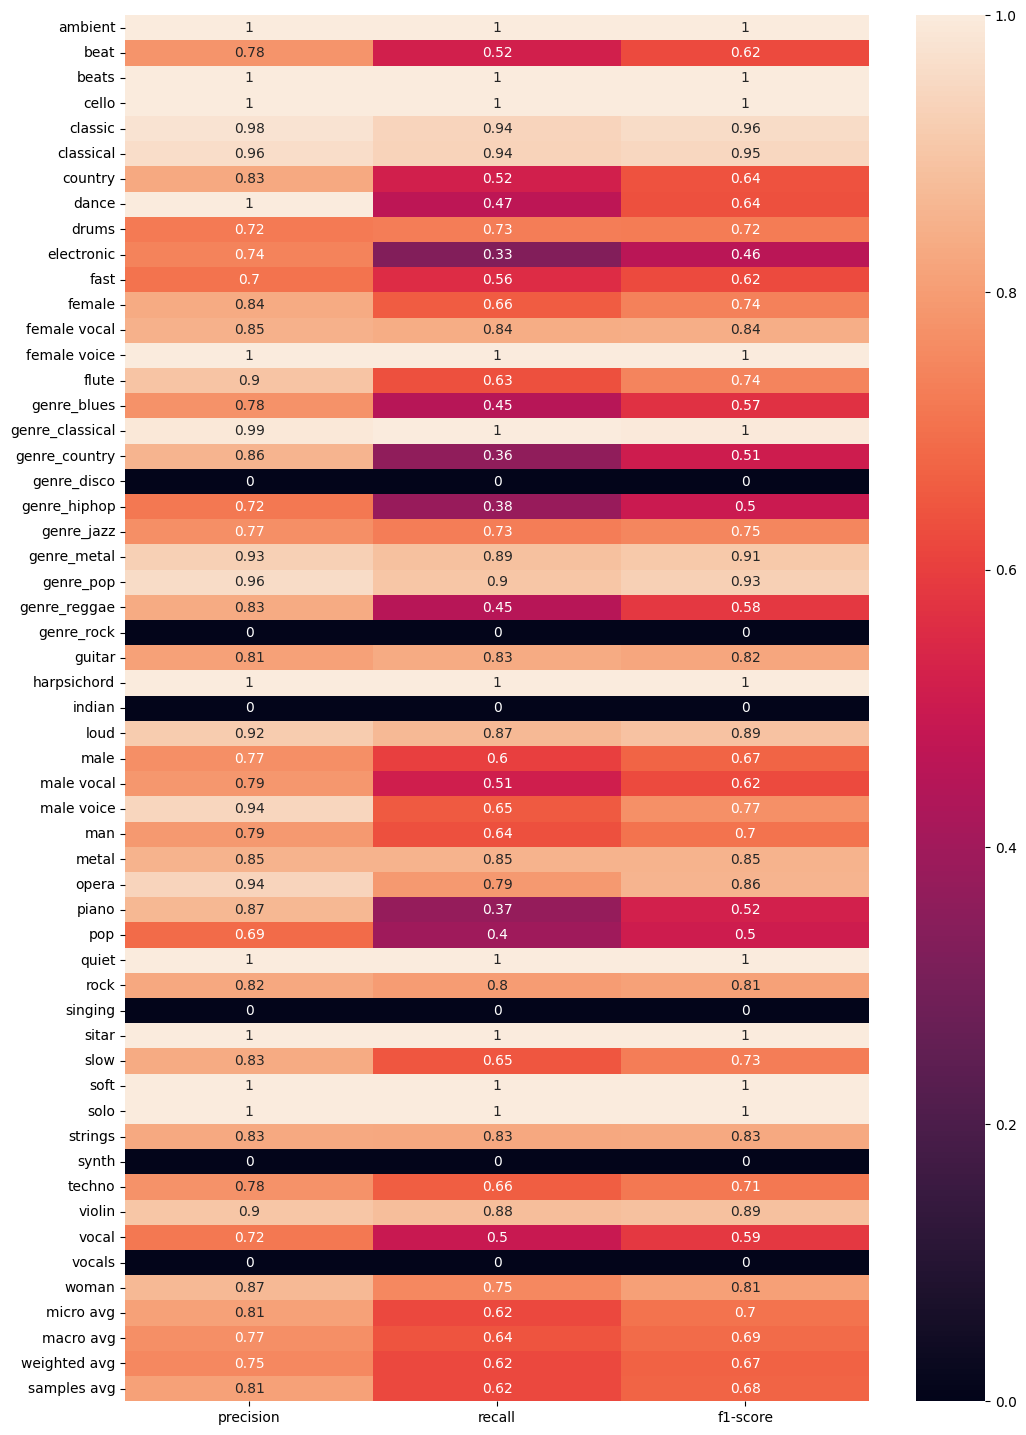

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

# Get model prediction using the full dataset
pred = clf.predict(audio_features)
# Print classification report
svmReport = metrics.classification_report(tag_matrix, pred, target_names=tags_df.columns[:-1], output_dict=True)
plt.figure(figsize=(12,18))
sn.heatmap(pd.DataFrame(svmReport).iloc[:-1, :].T, annot=True)
plt.show()

Compare and contrast using a linear SVM and NaiveBayes as the base classifier in the OneVsRestClassifier scheme for multi-label classification.

In [14]:
import sklearn.naive_bayes as nb

# Create and fit NB model
clf = OneVsRestClassifier(nb.GaussianNB())
clf.fit(audio_features, tag_matrix)

OneVsRestClassifier(estimator=GaussianNB())

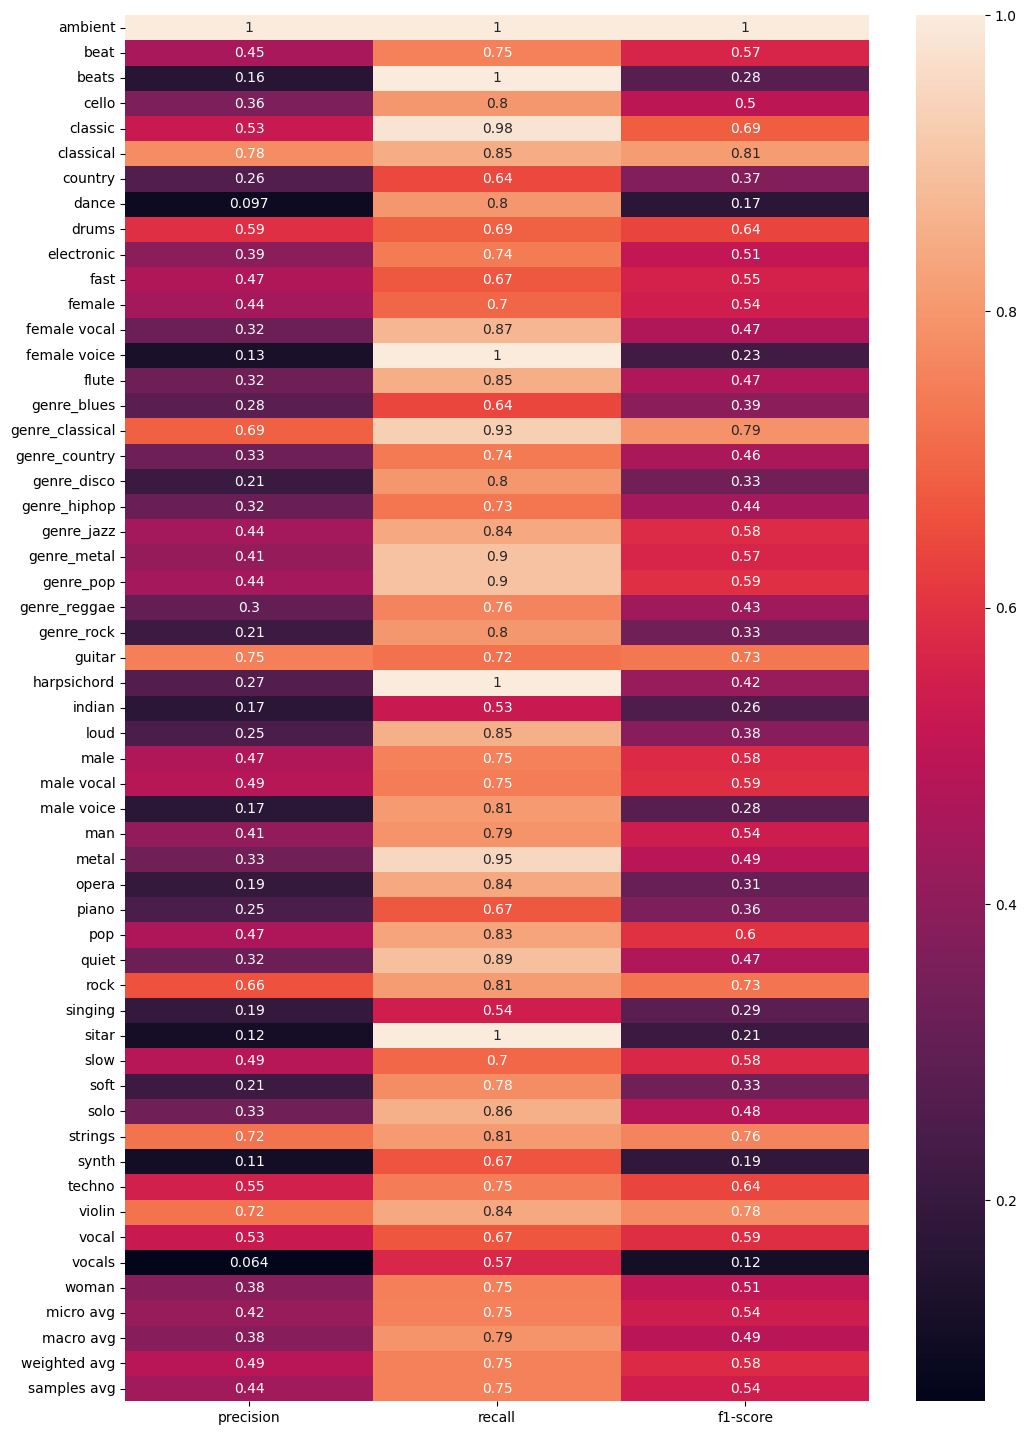

In [15]:
# Get model prediction using the full dataset
pred = clf.predict(audio_features)
# Print classification report
nbReport = metrics.classification_report(tag_matrix, pred, target_names=tags_df.columns[:-1], output_dict=True)
plt.figure(figsize=(12,18))
sn.heatmap(pd.DataFrame(nbReport).iloc[:-1, :].T, annot=True)
plt.show()

The Naive-Bayes classifier seems to be more consistent trough all tags but with a poor performance. the SVM classifier performs better overall but there are some tags where there are errors or the prediction is quite bad.

- In the last part of this assignment, we will actually use the musicnn network to do tag annotation and perform a small scale evaluation. Select the 10 tracks (one for each genre) from the GTZAN dataset that end with 00000.wav. You will need to install musicnn (https://github.com/jordipons/musicnn) and the associated dependencies such as librosa and tensorflow. For each of these 10 tracks compute the top 5 tags predicted by musicnn. Here is some example code:

The library musicnn is outdated and pip couldn't install it using py3.10...
I'm not going to spend hours trying to circumvent this issue...

In [ ]:
from musicnn.tagger import top_tags 

tags = top_tags(fname, model='MTT_musicnn', topN=5)